In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
X_scaled = StandardScaler().fit_transform(iris.data)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

In [4]:
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

In [10]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72962445 0.22850762]


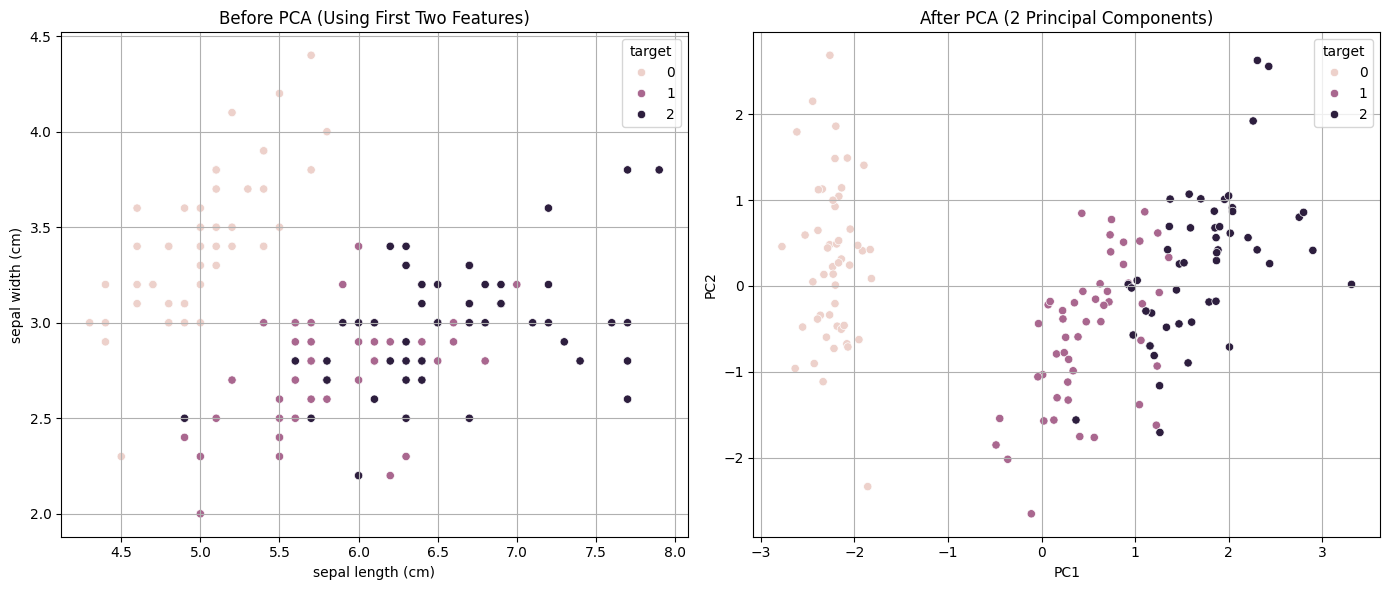

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(
    data=df,
    x=iris.feature_names[0],   
    y=iris.feature_names[1],   
    hue='target',
    ax=axes[0]
)
axes[0].set_title("Before PCA (Using First Two Features)")
axes[0].grid(True)

sns.scatterplot(
    data=df,
    x='PC1',
    y='PC2',
    hue='target',
    ax=axes[1]
)
axes[1].set_title("After PCA (2 Principal Components)")
axes[1].grid(True)

plt.tight_layout()
plt.show()